#파이썬으로 따라해보는 딥러닝 AI 프로젝트 실사례의 Chapter2
##<< 전이학습 >>
* 목표 : 당뇨망막병증의 상태를 확인하고, 병증의 중증도를 결정하기 위해 전이학습 사용
*당뇨망막병증(Diabetic retinopathy)이란?
>* 당뇨병의 합병증으로 망막의 미세혈관이 손상되었을 때 나타나는 것으로, 세계 각국의 실명 원인 중에서 가장 높은 비중을 차지함
>* 당뇨병을 30년이상 앓은 환자의 약90%에서 발생, 15년 전후에서는 약60~70%의 발병률을 보임
>*숙련된 임상의가 망막의 디지털 컬러 안저 검사 사진을 검사하고 평가하여 진단되며, 시간이 많이 걸리고, 수동적인 작업으로 이루어짐
*전이학습
>* 인간은 과거의 지식을 이용하여 새로운 문제를 더 좋은 방법으로 빠르게 풀 수 있다는 것에서 영감을 얻은 학습 방법
>*처음부터 인공신경망을 학습하는데 어려운 문제 해결 가능
>>* 잘 정해져 있는 초기 가중치 값을 얻을 수 있음 (인공신경망의 비용함수는 초기 가중치에 영향을 받음)
>>* 훈련 데이터가 부족할 때 과거에 습득한 지식을 활용할 수 있음
*적용한 학습모델
>>* InceptionV3 (Google)
>>* VGG16 (옥스포드 대학)
>>* ResNet (Microsoft)
* 데이터 셋
>>* https://www.kaggle.com/c/diabetic-retinopathy-detection/overview
>>* 훈련 데이터 : 17,563명의 왼쪽, 오른쪽 망막 사진 ( 35,126개의 이미지 )
>>* 이미지 라벨
>>>* 0 : 당뇨망막병증이 없음
>>>* 1 : 가벼운 당뇨망막병증
>>>* 2 : 중등도 당뇨망막병증
>>>* 3 : 심한 당뇨망막병증
>>>* 4 : 증식성 당뇨망막병증

전체 데이터 셋이 82.23GB라 1,664개의 데이터만 사용함
>질문) 데이터 셋이 클 때 보통 어떻게 하시는지????

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
from PIL import Image
from keras.preprocessing import image
import os
import numpy as np
import pandas as pd
from subprocess import check_output
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import matplotlib

Using TensorFlow backend.


      image  level
0   10_left      0
1  10_right      0
2   13_left      0
3  13_right      0
4   15_left      1
1664


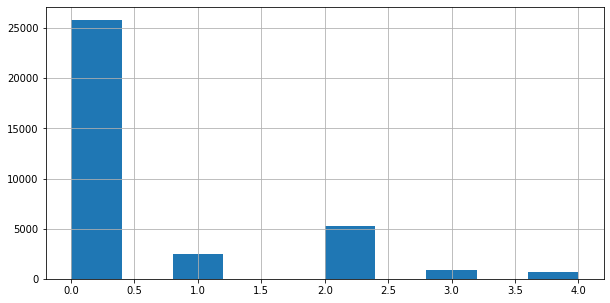

In [3]:
trainpath = "/content/gdrive/My Drive/diabeticdata/train/"
labelpath = "/content/gdrive/My Drive/diabeticdata/trainLabels.csv"
trainLabels = pd.read_csv(labelpath)
print(trainLabels.head())
listing = os.listdir(trainpath)
print(np.size(listing))
trainLabels['level'].hist(figsize=(10,5))

In [4]:
img_rows, img_cols = 224, 224
immatrix = []
imlabel = []

for file in listing:
    base = os.path.basename(trainpath + file)  
    fileName = os.path.splitext(base)[0]
    imlabel.append(trainLabels.loc[trainLabels.image==fileName, 'level'].values[0])
    im = Image.open(trainpath + file)
    img = im.resize((img_rows,img_cols))
    immatrix.append(np.array(img))

In [5]:
from collections import Counter
print(Counter(imlabel))

Counter({0: 1226, 2: 261, 1: 104, 3: 39, 4: 34})


**==> 클래스 불균형 발생**
* 클래스별 가중치 부여
* Data Augmentation

level: 0


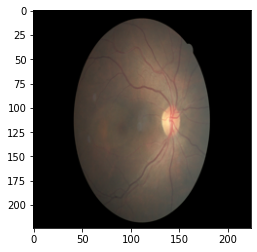

In [37]:
import matplotlib.pylab as plt
plt.imshow(immatrix[0])
print("level:", imlabel[0])

In [38]:
# 훈련과 테스트 데이터 셋 생성
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(immatrix, imlabel, test_size = 0.2, random_state = 42, stratify=imlabel)

print(np.array(x_train).shape)
print(np.array(y_train).shape)
print(np.array(x_test).shape)
print(np.array(y_test).shape)
print(Counter(y_train))
print(Counter(y_test))

(1331, 224, 224, 3)
(1331,)
(333, 224, 224, 3)
(333,)
Counter({0: 981, 2: 209, 1: 83, 3: 31, 4: 27})
Counter({0: 245, 2: 52, 1: 21, 3: 8, 4: 7})


In [39]:
# One-Hot Encoding
from keras.utils import np_utils

y_train = np_utils.to_categorical(np.array(y_train),5)
y_test = np_utils.to_categorical(np.array(y_test), 5)

x_train = np.array(x_train).astype("float32")/255.
x_test = np.array(x_test).astype("float32")/255.

print(np.array(x_train).shape)
print(np.array(x_test).shape)
print(np.array(y_train).shape)
print(np.array(y_test).shape)

(1331, 224, 224, 3)
(333, 224, 224, 3)
(1331, 5)
(333, 5)


In [40]:
# CNN 모델 생성
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

def createModel(LR, EPOCHS, NUM_CLASSES, inputShape):
    model = Sequential()
    # first set of CONV => RELU => MAX POOL layers
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=inputShape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(activation='softmax', units=NUM_CLASSES))    
    opt = Adam(lr=LR, decay=LR/ EPOCHS)    
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    return model

In [41]:
lr = 0.0001
epochs = 10
classnum = 5
print(x_train[0].shape)
cnnmodel = createModel(lr, epochs, classnum,x_train[0].shape)
cnnmodel.summary()


(224, 224, 3)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 222, 222, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 111, 111, 64)      18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 54, 

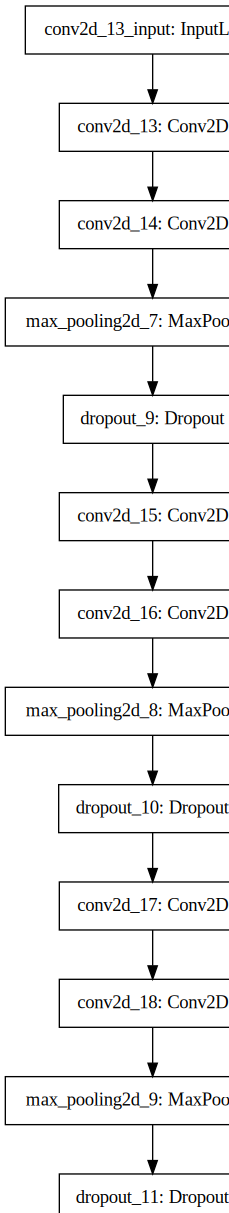

In [42]:
# add some visualization
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(cnnmodel).create(prog='dot', format='svg'))

In [43]:
#클래스 가중치 설정
class_weights={ 0: 1/((Counter(imlabel)[0]/len(imlabel))*100),
              1: 1/((Counter(imlabel)[1]/len(imlabel))*100),
              2: 1/((Counter(imlabel)[2]/len(imlabel))*100),
              3: 1/((Counter(imlabel)[3]/len(imlabel))*100),
              4: 1/((Counter(imlabel)[4]/len(imlabel))*100)}
print(class_weights)            


{0: 0.013572593800978793, 1: 0.16, 2: 0.06375478927203065, 3: 0.4266666666666667, 4: 0.4894117647058823}


In [44]:
#가중치 부여해서 실행
cnnmodel.fit(x_train, y_train, batch_size = 64, epochs=10, shuffle=True, verbose=2, class_weight=class_weights, validation_data=(x_test, y_test))

Train on 1331 samples, validate on 333 samples
Epoch 1/10
 - 11s - loss: 0.0822 - accuracy: 0.3020 - val_loss: 1.6107 - val_accuracy: 0.0240
Epoch 2/10
 - 11s - loss: 0.0803 - accuracy: 0.1315 - val_loss: 1.6096 - val_accuracy: 0.0601
Epoch 3/10
 - 11s - loss: 0.0802 - accuracy: 0.3704 - val_loss: 1.6076 - val_accuracy: 0.1712
Epoch 4/10
 - 11s - loss: 0.0801 - accuracy: 0.3110 - val_loss: 1.6049 - val_accuracy: 0.2583
Epoch 5/10
 - 11s - loss: 0.0800 - accuracy: 0.5364 - val_loss: 1.6030 - val_accuracy: 0.4595
Epoch 6/10
 - 11s - loss: 0.0799 - accuracy: 0.4884 - val_loss: 1.5980 - val_accuracy: 0.3483
Epoch 7/10
 - 11s - loss: 0.0798 - accuracy: 0.3591 - val_loss: 1.5986 - val_accuracy: 0.1231
Epoch 8/10
 - 11s - loss: 0.0789 - accuracy: 0.2667 - val_loss: 1.5983 - val_accuracy: 0.0991
Epoch 9/10
 - 11s - loss: 0.0794 - accuracy: 0.2870 - val_loss: 1.6027 - val_accuracy: 0.0781
Epoch 10/10
 - 11s - loss: 0.0794 - accuracy: 0.1998 - val_loss: 1.5954 - val_accuracy: 0.0631


In [46]:
score = cnnmodel.evaluate(x_test, y_test, verbose=0)
print(score)

[1.5954087270988717, 0.06306306272745132]


In [48]:
#가중치 부여하지 않고 실행
cnnmodel.fit(x_train, y_train, batch_size = 64, epochs=10, shuffle=True, verbose=2, validation_data=(x_test, y_test))

Train on 1331 samples, validate on 333 samples
Epoch 1/10
 - 11s - loss: 1.0219 - accuracy: 0.6995 - val_loss: 1.0389 - val_accuracy: 0.7357
Epoch 2/10
 - 11s - loss: 0.8920 - accuracy: 0.7370 - val_loss: 0.9860 - val_accuracy: 0.7357
Epoch 3/10
 - 11s - loss: 0.8669 - accuracy: 0.7370 - val_loss: 0.9749 - val_accuracy: 0.7357
Epoch 4/10
 - 11s - loss: 0.8597 - accuracy: 0.7370 - val_loss: 0.9236 - val_accuracy: 0.7357
Epoch 5/10
 - 11s - loss: 0.8555 - accuracy: 0.7370 - val_loss: 0.9553 - val_accuracy: 0.7357
Epoch 6/10
 - 11s - loss: 0.8553 - accuracy: 0.7370 - val_loss: 0.9619 - val_accuracy: 0.7357
Epoch 7/10
 - 11s - loss: 0.8521 - accuracy: 0.7370 - val_loss: 0.9287 - val_accuracy: 0.7357
Epoch 8/10
 - 11s - loss: 0.8534 - accuracy: 0.7370 - val_loss: 0.9224 - val_accuracy: 0.7357
Epoch 9/10
 - 11s - loss: 0.8532 - accuracy: 0.7370 - val_loss: 0.9453 - val_accuracy: 0.7357
Epoch 10/10
 - 11s - loss: 0.8545 - accuracy: 0.7370 - val_loss: 0.9566 - val_accuracy: 0.7357


In [49]:
# ResNet 모델 기반 전이학습
import keras
from keras.models import Model
from keras.applications.resnet50 import ResNet50
def createRresnetModel(LR, EPOCHS, NUM_CLASSES, inputShape, dim=224):
  restnet = ResNet50(include_top=False, weights='imagenet', input_shape=inputShape)
  output = restnet.layers[-1].output
  output = keras.layers.Flatten()(output)
  restnet = Model(restnet.input, output=output)
  for layer in restnet.layers:
      layer.trainable = False
  restnet.summary()
  model = Sequential()
  model.add(restnet)
  model.add(Dense(512, activation='relu', input_dim=inputShape))
  model.add(Dropout(0.5))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(activation='softmax', units=NUM_CLASSES))  
  opt = Adam(lr=LR, decay=LR/ EPOCHS)  
  model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
  return model

In [51]:
lr = 0.0001
epochs = 10
classnum = 5
resnetmodel = createRresnetModel(lr, epochs, classnum, x_train[0].shape)
resnetmodel.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(Tensor("in..., outputs=Tensor("fl...)`
  if __name__ == '__main__':


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

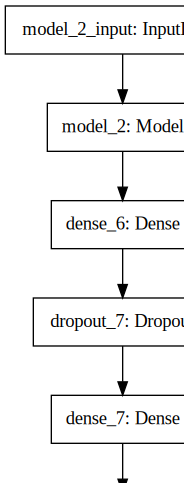

In [61]:
# add some visualization
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(resnetmodel).create(prog='dot', format='svg'))

In [52]:
#가중치 사용한 경우
resnetmodel.fit(x_train, y_train, batch_size = 64, epochs=10, shuffle=True, verbose=2, class_weight=class_weights,validation_data=(x_test, y_test))

Train on 1331 samples, validate on 333 samples
Epoch 1/10
 - 23s - loss: 0.2356 - accuracy: 0.2517 - val_loss: 1.1996 - val_accuracy: 0.7357
Epoch 2/10
 - 17s - loss: 0.1498 - accuracy: 0.2787 - val_loss: 1.2228 - val_accuracy: 0.7327
Epoch 3/10
 - 17s - loss: 0.0924 - accuracy: 0.3434 - val_loss: 1.2912 - val_accuracy: 0.7087
Epoch 4/10
 - 17s - loss: 0.0711 - accuracy: 0.3614 - val_loss: 1.1799 - val_accuracy: 0.7357
Epoch 5/10
 - 17s - loss: 0.0656 - accuracy: 0.4177 - val_loss: 1.2238 - val_accuracy: 0.7357
Epoch 6/10
 - 17s - loss: 0.0650 - accuracy: 0.4260 - val_loss: 1.1616 - val_accuracy: 0.7357
Epoch 7/10
 - 17s - loss: 0.0523 - accuracy: 0.4778 - val_loss: 1.1276 - val_accuracy: 0.7357
Epoch 8/10
 - 17s - loss: 0.0605 - accuracy: 0.4455 - val_loss: 1.1091 - val_accuracy: 0.7357
Epoch 9/10
 - 17s - loss: 0.0496 - accuracy: 0.4463 - val_loss: 1.1329 - val_accuracy: 0.7357
Epoch 10/10
 - 17s - loss: 0.0417 - accuracy: 0.5071 - val_loss: 1.0782 - val_accuracy: 0.7357


In [53]:
#가중치 사용 안한 경우
resnetmodel.fit(x_train, y_train, batch_size = 64, epochs=10, shuffle=True, verbose=2, validation_data=(x_test, y_test))

Train on 1331 samples, validate on 333 samples
Epoch 1/10
 - 17s - loss: 1.2401 - accuracy: 0.6559 - val_loss: 0.9308 - val_accuracy: 0.7357
Epoch 2/10
 - 17s - loss: 1.0232 - accuracy: 0.7070 - val_loss: 0.9244 - val_accuracy: 0.7357
Epoch 3/10
 - 17s - loss: 0.9404 - accuracy: 0.7333 - val_loss: 0.9119 - val_accuracy: 0.7357
Epoch 4/10
 - 17s - loss: 0.7647 - accuracy: 0.7784 - val_loss: 0.9049 - val_accuracy: 0.7357
Epoch 5/10
 - 17s - loss: 0.7473 - accuracy: 0.7851 - val_loss: 0.9122 - val_accuracy: 0.7357
Epoch 6/10
 - 17s - loss: 0.5727 - accuracy: 0.8197 - val_loss: 1.0883 - val_accuracy: 0.7357
Epoch 7/10
 - 17s - loss: 0.5377 - accuracy: 0.8437 - val_loss: 1.0484 - val_accuracy: 0.7357
Epoch 8/10
 - 17s - loss: 0.4831 - accuracy: 0.8625 - val_loss: 1.1612 - val_accuracy: 0.7357
Epoch 9/10
 - 17s - loss: 0.3969 - accuracy: 0.8670 - val_loss: 1.1969 - val_accuracy: 0.7357
Epoch 10/10
 - 17s - loss: 0.4016 - accuracy: 0.8723 - val_loss: 1.2996 - val_accuracy: 0.7357


In [54]:
score = resnetmodel.evaluate(x_train, y_train, verbose=0)
print(score)

[1.2899757240339833, 0.7370398044586182]


In [55]:
# VGG16 모델을 이용한 전이학습
import keras
from keras.models import Model
from keras.applications import VGG16
def createVGG16Model(LR, EPOCHS, NUM_CLASSES, inputShape, dim=224):
  vgg = VGG16(include_top=False, weights='imagenet', input_shape=inputShape)
  output = vgg.layers[-1].output
  output = keras.layers.Flatten()(output)
  vgg = Model(vgg.input, output=output)
  for layer in vgg.layers:
      layer.trainable = False
  vgg.summary()
  model = Sequential()
  model.add(vgg)
  model.add(Dense(512, activation='relu', input_dim=inputShape))
  model.add(Dropout(0.5))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(activation='softmax', units=NUM_CLASSES))  
  opt = Adam(lr=LR, decay=LR/ EPOCHS)  
  model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
  return model

In [56]:
lr = 0.0001
epochs = 10
classnum = 5
vggmodel = createVGG16Model(lr, epochs, classnum, x_train[0].shape)
vggmodel.summary()

58892288/58889256 [==============================] - 5s 0us/step
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(Tensor("in..., outputs=Tensor("fl...)`
  if __name__ == '__main__':


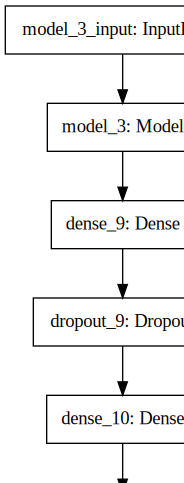

In [72]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(vggmodel).create(prog='dot', format='svg'))

In [57]:
#가중치 사용한 경우
vggmodel.fit(x_train, y_train, batch_size = 64, epochs=10, shuffle=True, verbose=2,class_weight=class_weights,validation_data=(x_test, y_test))

Train on 1331 samples, validate on 333 samples
Epoch 1/10
 - 26s - loss: 0.1038 - accuracy: 0.2307 - val_loss: 1.3910 - val_accuracy: 0.5195
Epoch 2/10
 - 15s - loss: 0.0928 - accuracy: 0.2352 - val_loss: 1.4909 - val_accuracy: 0.4444
Epoch 3/10
 - 15s - loss: 0.0908 - accuracy: 0.2096 - val_loss: 1.7324 - val_accuracy: 0.0541
Epoch 4/10
 - 15s - loss: 0.0826 - accuracy: 0.2577 - val_loss: 1.6121 - val_accuracy: 0.1111
Epoch 5/10
 - 15s - loss: 0.0832 - accuracy: 0.1998 - val_loss: 1.6514 - val_accuracy: 0.0991
Epoch 6/10
 - 15s - loss: 0.0786 - accuracy: 0.1751 - val_loss: 1.7243 - val_accuracy: 0.0631
Epoch 7/10
 - 15s - loss: 0.0821 - accuracy: 0.1698 - val_loss: 1.5643 - val_accuracy: 0.2012
Epoch 8/10
 - 15s - loss: 0.0805 - accuracy: 0.1826 - val_loss: 1.6275 - val_accuracy: 0.0931
Epoch 9/10
 - 15s - loss: 0.0797 - accuracy: 0.1480 - val_loss: 1.6297 - val_accuracy: 0.0360
Epoch 10/10
 - 15s - loss: 0.0790 - accuracy: 0.1247 - val_loss: 1.6669 - val_accuracy: 0.0240


In [58]:
#가중치 사용한 경우
vggmodel.fit(x_train, y_train, batch_size = 64, epochs=10, shuffle=True, verbose=2,validation_data=(x_test, y_test))

Train on 1331 samples, validate on 333 samples
Epoch 1/10
 - 15s - loss: 1.1819 - accuracy: 0.6153 - val_loss: 0.8573 - val_accuracy: 0.7357
Epoch 2/10
 - 15s - loss: 0.9556 - accuracy: 0.7190 - val_loss: 0.8945 - val_accuracy: 0.7357
Epoch 3/10
 - 15s - loss: 0.9305 - accuracy: 0.7265 - val_loss: 0.8820 - val_accuracy: 0.7357
Epoch 4/10
 - 15s - loss: 0.9199 - accuracy: 0.7303 - val_loss: 0.8900 - val_accuracy: 0.7357
Epoch 5/10
 - 15s - loss: 0.9041 - accuracy: 0.7310 - val_loss: 0.8511 - val_accuracy: 0.7357
Epoch 6/10
 - 15s - loss: 0.9246 - accuracy: 0.7310 - val_loss: 0.8479 - val_accuracy: 0.7357
Epoch 7/10
 - 15s - loss: 0.8936 - accuracy: 0.7355 - val_loss: 0.8485 - val_accuracy: 0.7357
Epoch 8/10
 - 15s - loss: 0.9207 - accuracy: 0.7370 - val_loss: 0.8472 - val_accuracy: 0.7357
Epoch 9/10
 - 15s - loss: 0.8947 - accuracy: 0.7363 - val_loss: 0.8571 - val_accuracy: 0.7357
Epoch 10/10
 - 15s - loss: 0.8900 - accuracy: 0.7363 - val_loss: 0.8462 - val_accuracy: 0.7357


In [59]:
# Data augumentation
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, \
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,\
    horizontal_flip=True, fill_mode="nearest")
aug.fit(x_train)

In [60]:
data_flow=aug.flow(x_train, y_train, batch_size=64)

In [61]:
history=cnnmodel.fit_generator(data_flow, steps_per_epoch=100, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
100/100 [==============================] - 87s 872ms/step - loss: 0.8663 - accuracy: 0.7359 - val_loss: 0.8935 - val_accuracy: 0.7357
Epoch 2/10
100/100 [==============================] - 87s 871ms/step - loss: 0.8508 - accuracy: 0.7387 - val_loss: 0.8701 - val_accuracy: 0.7357
Epoch 3/10
100/100 [==============================] - 87s 869ms/step - loss: 0.8507 - accuracy: 0.7372 - val_loss: 0.8776 - val_accuracy: 0.7357
Epoch 4/10
100/100 [==============================] - 86s 864ms/step - loss: 0.8462 - accuracy: 0.7370 - val_loss: 0.8487 - val_accuracy: 0.7357
Epoch 5/10
100/100 [==============================] - 87s 869ms/step - loss: 0.8541 - accuracy: 0.7339 - val_loss: 0.8620 - val_accuracy: 0.7357
Epoch 6/10
100/100 [==============================] - 87s 871ms/step - loss: 0.8399 - accuracy: 0.7401 - val_loss: 0.8737 - val_accuracy: 0.7357
Epoch 7/10
100/100 [==============================] - 86s 861ms/step - loss: 0.8333 - accuracy: 0.7392 - val_loss: 0.8539 - val_ac

In [64]:
result = cnnmodel.evaluate(x_test, y_test, batch_size=64)
print(result)


333/333 [==============================] - 1s 3ms/step
[0.8521148800491929, 0.7387387156486511]
